# 2.26 기준 네이버 영화 평점 기준 워드클라우드 만들기

In [29]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
os.kill(os.getpid(), 9)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [4]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
os.chdir('/content/drive/MyDrive/data/data_science')
sys.path.append(os.chdir)

In [7]:
from urllib.request import urlopen, Request

url_base = "https://movie.naver.com/"
url_sub = "movie/sdb/rank/rmovie.naver?sel=cur&date=20220226"

url = url_base + url_sub
urlTicker = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

page = urlopen(urlTicker)

soup = BeautifulSoup(page, 'html.parser')
# soup

In [8]:
soup.find_all('div', 'tit5')[:5]

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213624" title="전투왕">전투왕</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=187320" title="씽2게더">씽2게더</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=213733" title="극장판 주술회전 0">극장판 주술회전 0</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>]

In [9]:
from tqdm import tqdm_notebook

end = len(soup.find_all('div', 'tit5'))

movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)]
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, end)]

In [10]:
movie = pd.DataFrame({'name':movie_name, 'point':movie_point})
movie.head()

,name,point
0,전투왕,9.52
1,씽2게더,9.42
2,극장판 주술회전 0,9.40
3,코다,9.21
4,킹 오브 프리즘,9.18


In [11]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    31 non-null     object
 1   point   31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [12]:
movie['point'] = movie['point'].astype(float)

In [13]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    31 non-null     object 
 1   point   31 non-null     float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


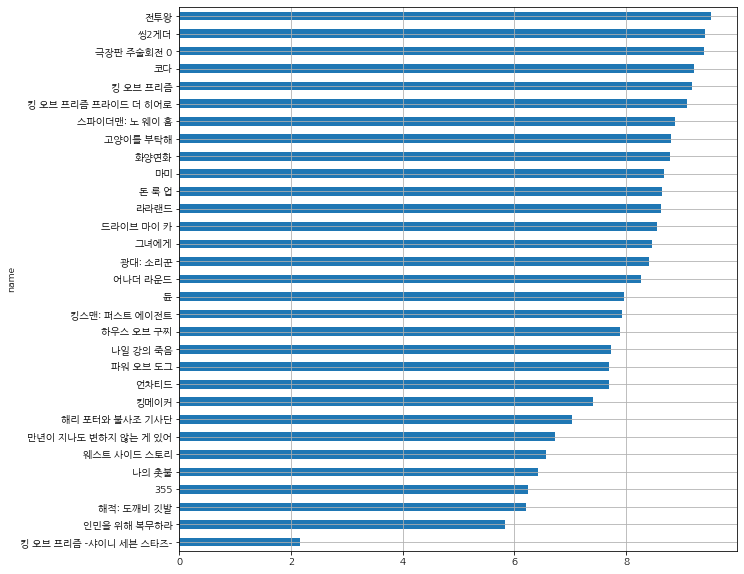

In [18]:
mm = movie.set_index('name').sort_values(by='point', ascending=True)
mm.rename({'name':'영화'})

mm['point'].plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

In [26]:
movie['point'] = movie['point'] * 10

In [27]:
lst = [(movie['name'][n], movie['point'][n]) for n in range(31)]

p = dict(lst)

In [24]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 60.9 MB/s 


In [25]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image

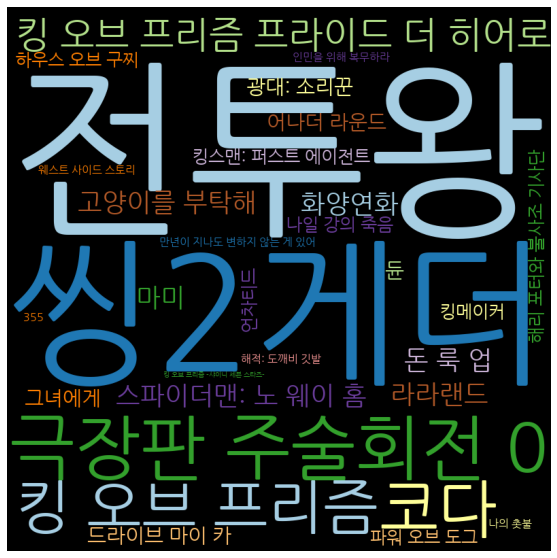

In [48]:
wc = WordCloud(font_path=font_name, width=400, height=400, scale=2.0, background_color='black',
               colormap='Paired', max_font_size=250)
gen = wc.generate_from_frequencies(p)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(gen)

In [49]:
gen.to_file('movie.jpg')